# Imports

In [1]:
import numpy as np
import pandas as pd
import os

from skimage.transform import resize   # Image Processing Library
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc    # Garbage Collector
gc.collect()

import random

import os

# Pytorch

import sklearn

import torch
import torchvision

from torch.utils.data import Dataset, SubsetRandomSampler, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from torchvision.io import read_image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from tqdm import trange

import PIL

# Preparation of Dataset

In [2]:
# Input data files (dogs_and_cats) are available in the "../data/dogs_and_cats/" directory.
print(os.listdir("../data/normal_tumor"))

['NORMAL', 'TUMOR']


In [3]:
print(os.listdir("../data/normal_tumor/"))

['NORMAL', 'TUMOR']


In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, label, img_dir, transform=None, target_transform=None):
        self.label = label
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(os.listdir(self.img_dir))

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, os.listdir(self.img_dir)[idx])
        PIL_img = PIL.Image.open(img_path)
        image = ToTensor()(PIL_img)
        image = image[0].unsqueeze(0)
        label = self.label
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.label
        return image, label

In [5]:
normal_img_dir = "../data/normal_tumor/NORMAL"
tumor_img_dir = "../data/normal_tumor/TUMOR"

In [6]:
normal_dataset = CustomImageDataset("Normal", normal_img_dir)
tumor_dataset = CustomImageDataset("Tumor", tumor_img_dir)

In [7]:
len(normal_dataset)

3750

In [8]:
len(tumor_dataset)

625

In [9]:
dataset = normal_dataset + tumor_dataset

In [10]:
len(dataset)

4375

# Preparation of Train/Valid/Test Loader

In [11]:
BATCH_SIZE = 5
TEST_SPLIT = 0.1
VALIDATION_SPLIT = 0.2
SHUFFLE_DATASET = True
RANDOM_SEED = 42
# WIDTH = 128
# HEIGHT = 128

In [12]:
# Train/Test Split

dataset_size = len(dataset)
indices = list(range(dataset_size))
test_split = int(np.floor(TEST_SPLIT * dataset_size)+3)   # To match train/valid/test divisible by 10
if SHUFFLE_DATASET:
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(indices)
train_indices, test_indices = indices[test_split:], indices[:test_split]

# Train/Validation Split
train_size = len(train_indices)
valid_split = int(np.floor(VALIDATION_SPLIT * train_size)+3)
if SHUFFLE_DATASET:
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(train_indices)
train_indices, val_indices = train_indices[valid_split:], train_indices[:valid_split]


# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, 
                          sampler=train_sampler)
valid_loader = DataLoader(dataset, batch_size=BATCH_SIZE,
                          sampler=valid_sampler)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE,
                         sampler=valid_sampler)

In [13]:
len(train_sampler)

3145

In [14]:
len(valid_sampler)

790

In [15]:
len(test_sampler)

440

In [16]:
# Sample Image and Annotation

sample_img, sample_label = next(iter(train_loader))

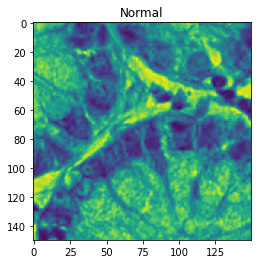

In [17]:
plt.imshow(sample_img[0].squeeze());
plt.title(f"{sample_label[0]}");